In [305]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
sns.set(style="whitegrid")

In [307]:
import warnings
warnings.filterwarnings('ignore')

In [308]:
white_wine = pd.read_csv(r'/Users/samuelmascarenhas/Desktop/Capstone/Wine/winequality-white.csv')

In [309]:
red_wine = pd.read_csv(r'/Users/samuelmascarenhas/Desktop/Capstone/Wine/winequality-red.csv')

In [310]:
white_wine['type'] = 'white'

In [311]:
red_wine['type'] = 'red'

In [312]:
data = pd.concat([white_wine,red_wine], ignore_index=True)

In [313]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1316,7.9,0.255,0.26,2.0,0.026,40.0,190.0,0.99320,3.04,0.39,11.2,6,white
2238,6.1,0.150,0.29,6.2,0.046,39.0,151.0,0.99471,3.60,0.44,10.6,6,white
647,7.4,0.105,0.34,12.2,0.050,57.0,146.0,0.99730,3.16,0.37,9.0,6,white
163,7.4,0.240,0.42,14.0,0.066,48.0,198.0,0.99790,2.89,0.42,8.9,6,white
4868,5.8,0.230,0.31,4.5,0.046,42.0,124.0,0.99324,3.31,0.64,10.8,6,white


In [314]:
df =data.copy()

### EDA - Exploratory Data Analysis

In [315]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [317]:
df.describe().T.style.background_gradient(cmap = 'Purples')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.000000,7.215307,1.296434,3.800000,6.400000,7.000000,7.700000,15.900000
volatile acidity,6497.000000,0.339666,0.164636,0.080000,0.230000,0.290000,0.400000,1.580000
citric acid,6497.000000,0.318633,0.145318,0.000000,0.250000,0.310000,0.390000,1.660000
residual sugar,6497.000000,5.443235,4.757804,0.600000,1.800000,3.000000,8.100000,65.800000
chlorides,6497.000000,0.056034,0.035034,0.009000,0.038000,0.047000,0.065000,0.611000
free sulfur dioxide,6497.000000,30.525319,17.749400,1.000000,17.000000,29.000000,41.000000,289.000000
total sulfur dioxide,6497.000000,115.744574,56.521855,6.000000,77.000000,118.000000,156.000000,440.000000
density,6497.000000,0.994697,0.002999,0.987110,0.992340,0.994890,0.996990,1.038980
pH,6497.000000,3.218501,0.160787,2.720000,3.110000,3.210000,3.320000,4.010000
sulphates,6497.000000,0.531268,0.148806,0.220000,0.430000,0.510000,0.600000,2.000000


In [318]:
n_cols = 3
n_rows = int(len(df.columns) / n_cols) + (len(df.columns) % n_cols > 0)

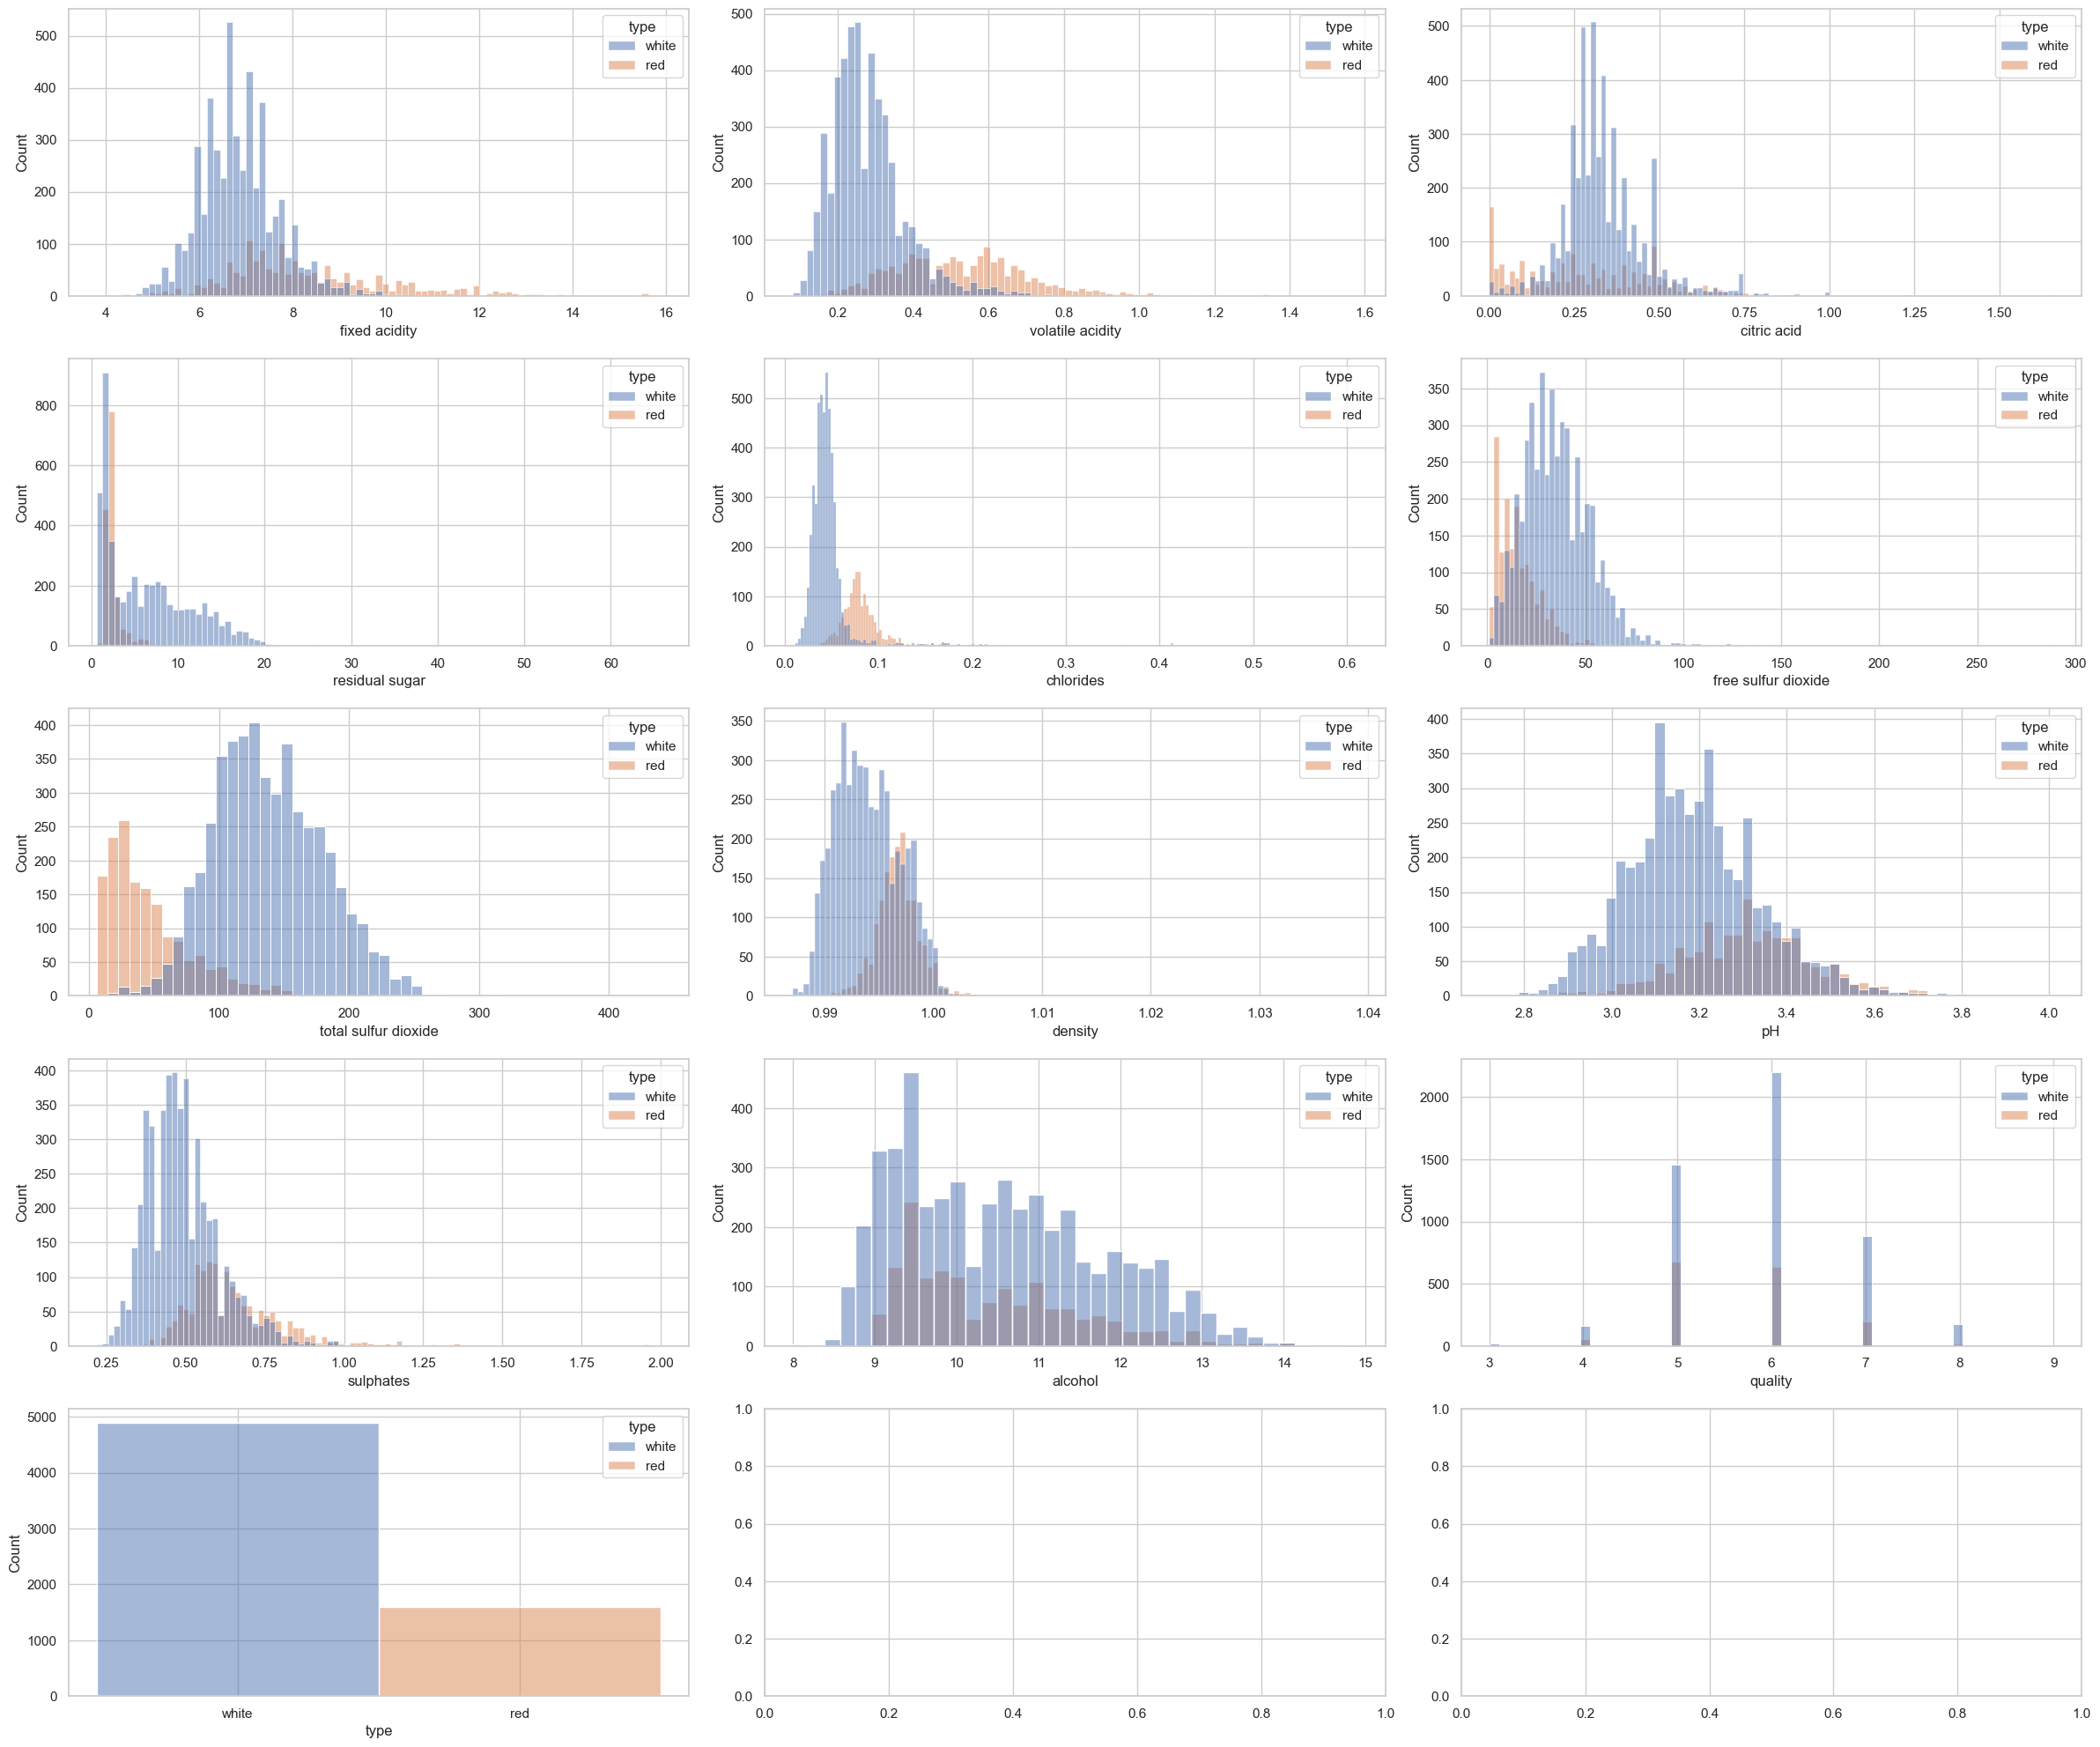

In [319]:
fig, axes = plt.subplots(5, 3, figsize=(8 * 3, 4 * 5))

for i, col in enumerate(df.columns):
    row = i // n_cols
    col_index = i % n_cols

    sns.histplot(df, x=col, hue='type', ax=axes[row, col_index])

plt.tight_layout()
plt.show()

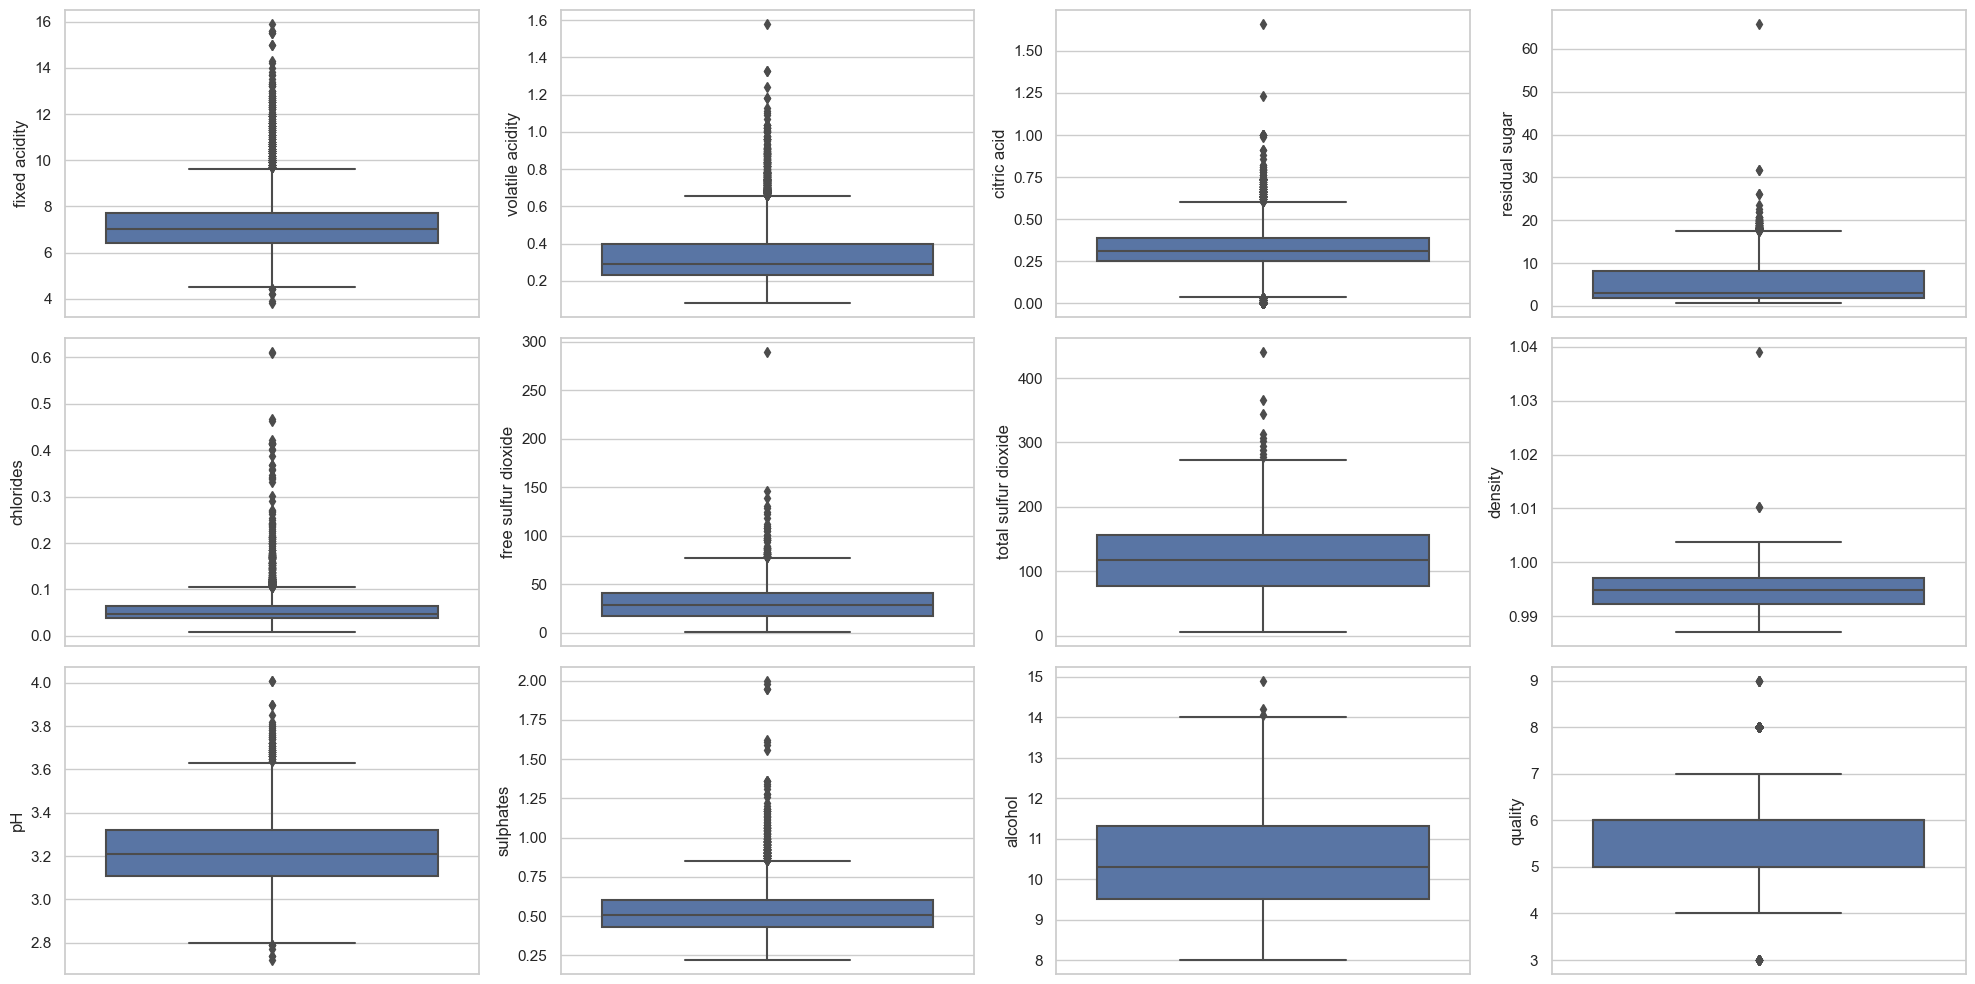

In [320]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
        
plt.tight_layout()

In [321]:
from scipy import stats

In [322]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [323]:

outlier_columns = ['citric acid', 'residual sugar', 'free sulfur dioxide', 'density']


In [324]:

for col in outlier_columns:
    col_mean = df[col].mean()
    col_std = df[col].std()
    
    z_scores = stats.zscore(df[col])
    
    outliers = np.abs(z_scores) > 4
    
    df.loc[outliers, col] = col_mean



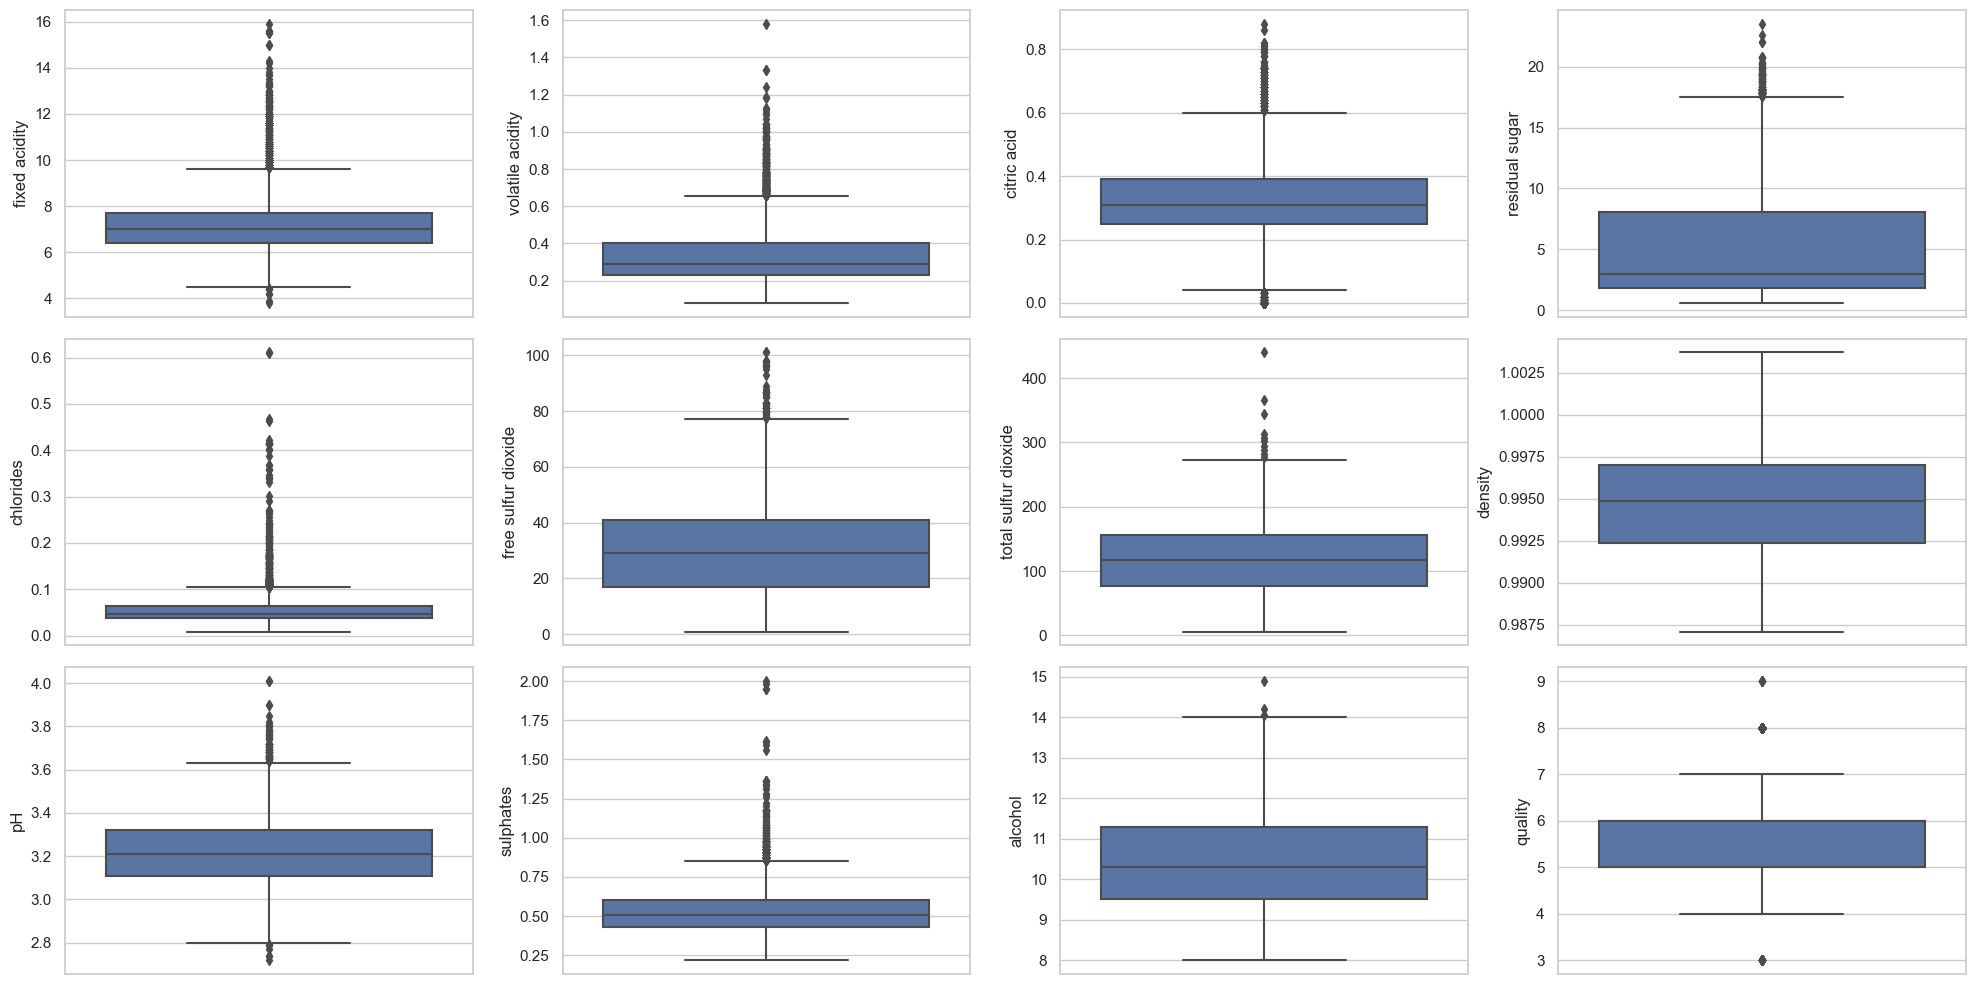

In [325]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
        
plt.tight_layout()

In [326]:
df_dummies = pd.get_dummies(df, columns=['type'],dtype='int' )

In [327]:
df_dummies.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
2316,7.4,0.20,0.31,1.6,0.038,34.0,116.0,0.99120,3.25,0.39,12.00,7,0,1
234,7.2,0.23,0.38,14.3,0.058,55.0,194.0,0.99790,3.09,0.44,9.00,6,0,1
2187,6.8,0.25,0.18,1.4,0.056,13.0,137.0,0.99350,3.11,0.42,9.50,5,0,1
4882,5.5,0.32,0.13,1.3,0.037,45.0,156.0,0.99184,3.26,0.38,10.70,5,0,1
4494,7.5,0.24,0.29,1.1,0.046,34.0,84.0,0.99020,3.04,0.39,11.45,6,0,1
1355,7.6,0.19,0.41,1.1,0.040,38.0,143.0,0.99070,2.92,0.42,11.40,5,0,1
4050,7.4,0.16,0.27,15.5,0.050,25.0,135.0,0.99840,2.90,0.43,8.70,7,0,1
3810,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.50,3,0,1
6385,6.0,0.64,0.05,1.9,0.066,9.0,17.0,0.99496,3.52,0.78,10.60,5,1,0
4680,6.8,0.63,0.04,1.3,0.058,25.0,133.0,0.99271,3.17,0.39,10.20,4,0,1


In [328]:
df = df_dummies.copy()

In [329]:
df['type'] = df['type_red'].apply(lambda x: 'red' if x == 1 else 'white')

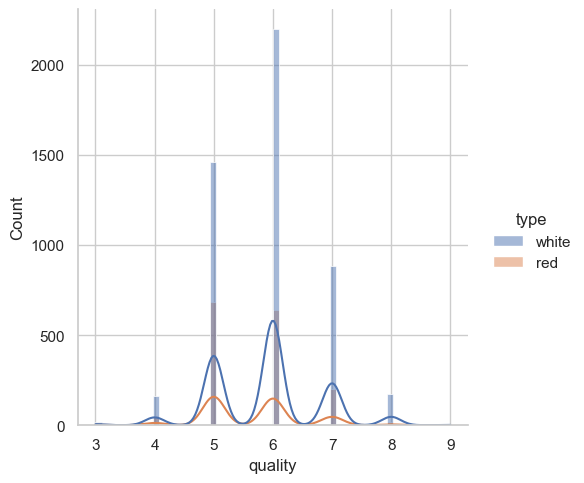

In [330]:
sns.displot(df, x = 'quality', hue = 'type', kde = True, fill=True)

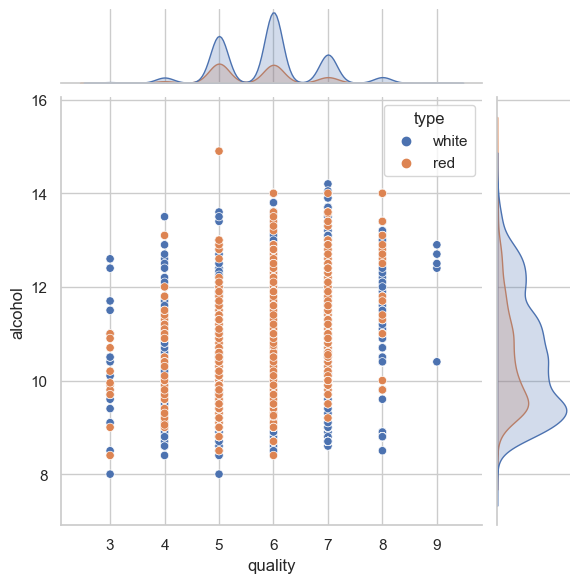

In [331]:
sns.jointplot(x = df['quality'], y = df['alcohol'], hue= df['type'])

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_red              6497 non-null   int64  
 13  type_white            6497 non-null   int64  
 14  type                  6497 non-null   object 
dtypes: float64(11), int64

In [334]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_red', 'type_white',
       'type'],
      dtype='object')

In [335]:
df_num = df[[
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_red', 'type_white',
       ]]

In [336]:
df_num.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
3270,6.4,0.150,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.2,5,0,1
1572,6.9,0.220,0.49,7.0,0.063,50.0,168.0,0.99570,3.54,0.50,10.3,6,0,1
1508,6.8,0.210,0.49,14.5,0.060,50.0,170.0,0.99910,3.55,0.44,9.8,6,0,1
5246,9.6,0.560,0.31,2.8,0.089,15.0,46.0,0.99790,3.11,0.92,10.0,6,1,0
2629,5.8,0.600,0.00,1.3,0.044,72.0,197.0,0.99202,3.56,0.43,10.9,5,0,1
1727,7.6,0.445,0.44,14.5,0.045,68.0,212.0,0.99860,3.48,0.36,10.0,6,0,1
3107,7.7,0.250,0.49,2.5,0.047,31.0,169.0,0.99252,3.07,0.57,10.6,6,0,1
5943,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6,1,0
5586,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5,1,0
927,6.7,0.250,0.33,2.9,0.057,52.0,173.0,0.99340,3.02,0.48,9.5,7,0,1


In [337]:
avg_quality = df.select_dtypes(exclude=['object']).groupby("quality").mean().round(2)
avg_quality.style.background_gradient(cmap = 'Blues')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
quality,,,,,,,,,,,,,
3,7.850000,0.520000,0.280000,5.140000,0.080000,20.690000,122.030000,1.000000,3.260000,0.510000,10.220000,0.330000,0.670000
4,7.290000,0.460000,0.270000,4.150000,0.060000,19.710000,103.430000,0.990000,3.230000,0.510000,10.180000,0.250000,0.750000
5,7.330000,0.390000,0.310000,5.800000,0.060000,30.110000,120.840000,1.000000,3.210000,0.530000,9.840000,0.320000,0.680000
6,7.180000,0.310000,0.320000,5.500000,0.050000,31.080000,115.410000,0.990000,3.220000,0.530000,10.590000,0.220000,0.780000
7,7.130000,0.290000,0.330000,4.730000,0.050000,30.350000,108.500000,0.990000,3.230000,0.550000,11.390000,0.180000,0.820000
8,6.840000,0.290000,0.330000,5.380000,0.040000,33.760000,117.520000,0.990000,3.220000,0.510000,11.680000,0.090000,0.910000
9,7.420000,0.300000,0.390000,4.120000,0.030000,33.400000,116.000000,0.990000,3.310000,0.470000,12.180000,0.000000,1.000000


In [338]:
df_corr = df_num.corr()

In [339]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

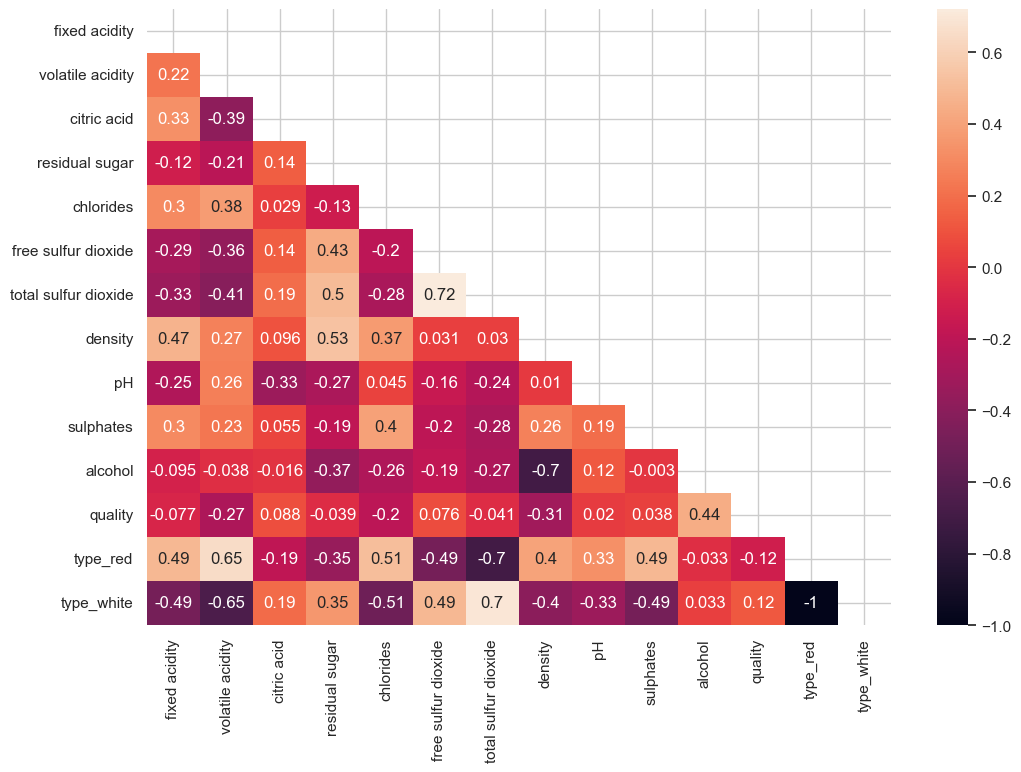

In [340]:
plt.figure(figsize=(12, 8))

sns.heatmap(df_corr, mask=mask, annot=True)
plt.show()

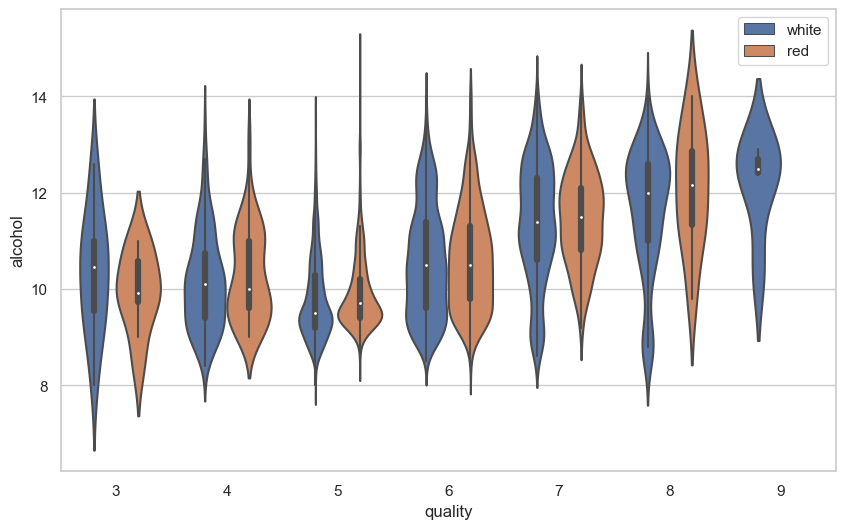

In [341]:
plt.figure(figsize=(10,6))
sns.violinplot(data = df, x = 'quality', y = 'alcohol', hue = 'type')
plt.legend(loc='best')

<Axes: xlabel='density', ylabel='alcohol'>

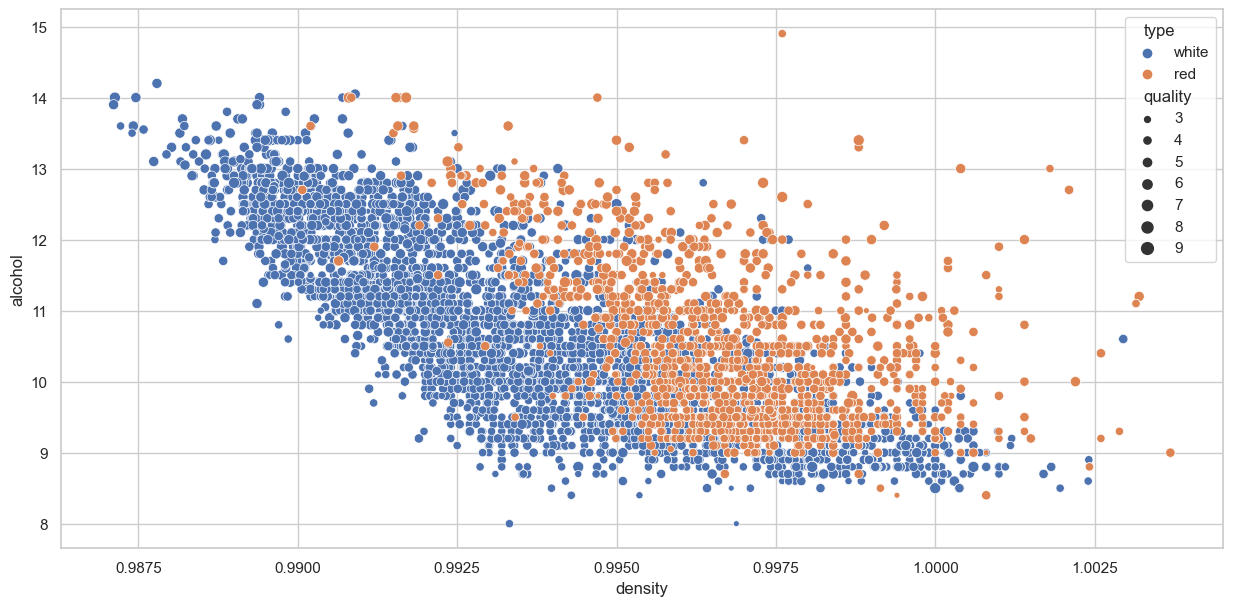

In [342]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="density",y="alcohol", hue='type', size = 'quality' )

<Axes: xlabel='type', ylabel='quality'>

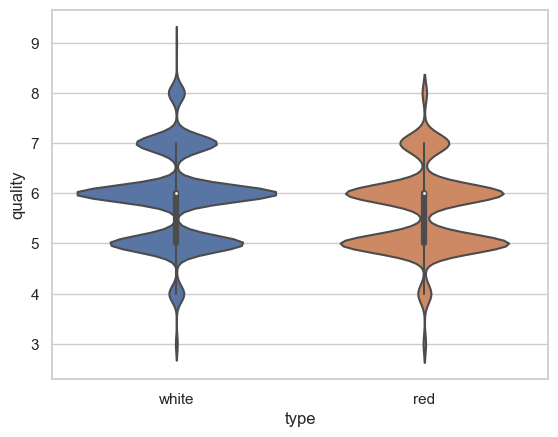

In [343]:
sns.violinplot(data = df, x= 'type', y = 'quality' )

In [344]:
df['type'].value_counts(normalize=True)

type
white    0.753886
red      0.246114
Name: proportion, dtype: float64

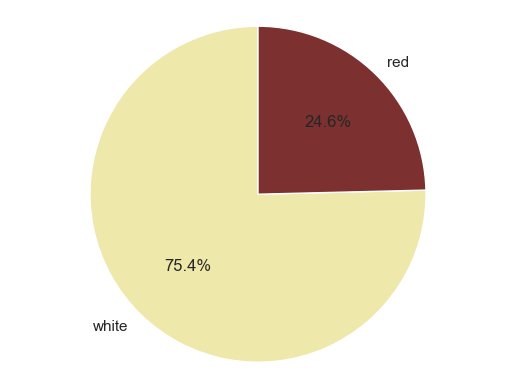

In [345]:
colors = ['palegoldenrod' if x == 'white' else '#7C3030' for x in value_counts.index]

fig, ax = plt.subplots()
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

ax.axis('equal')

plt.show()

<Axes: xlabel='type'>

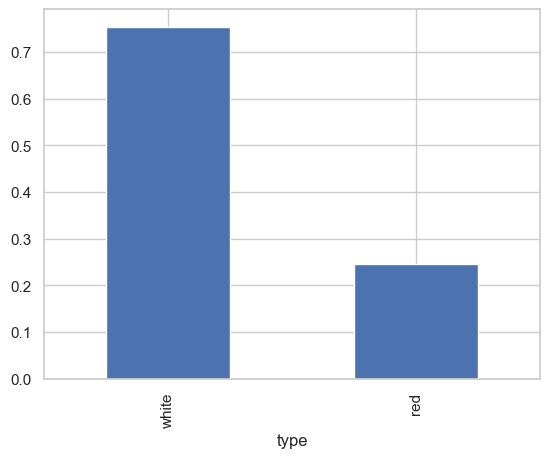

In [346]:
df['type'].value_counts(normalize=True).plot(kind='bar')

In [347]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_red', 'type_white',
       'type'],
      dtype='object')

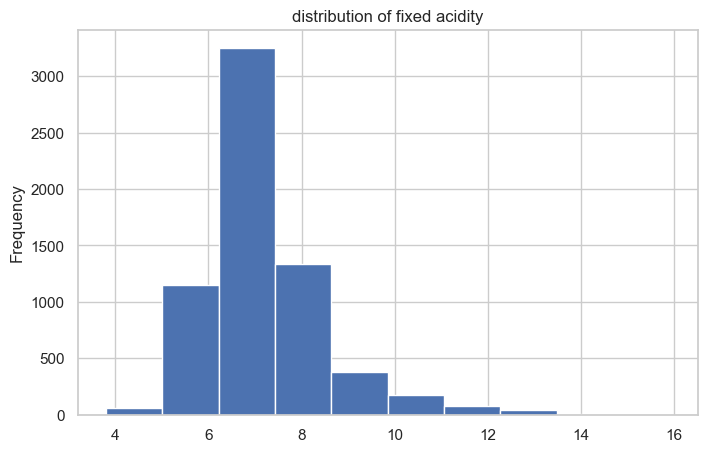

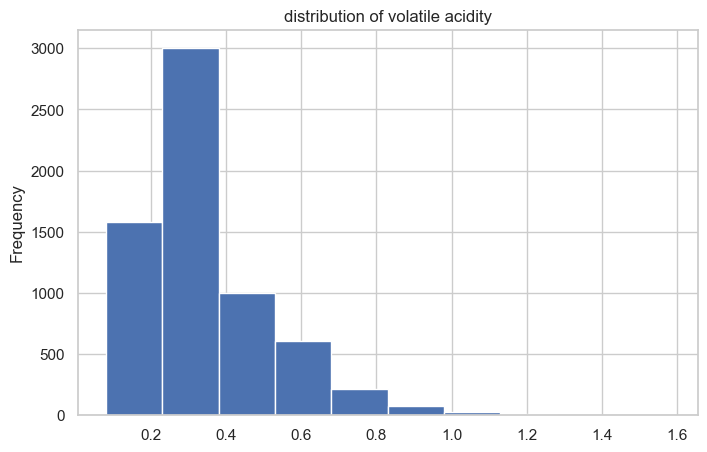

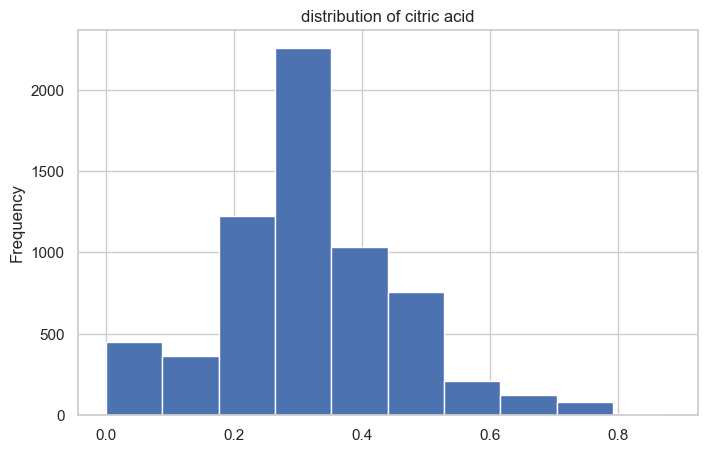

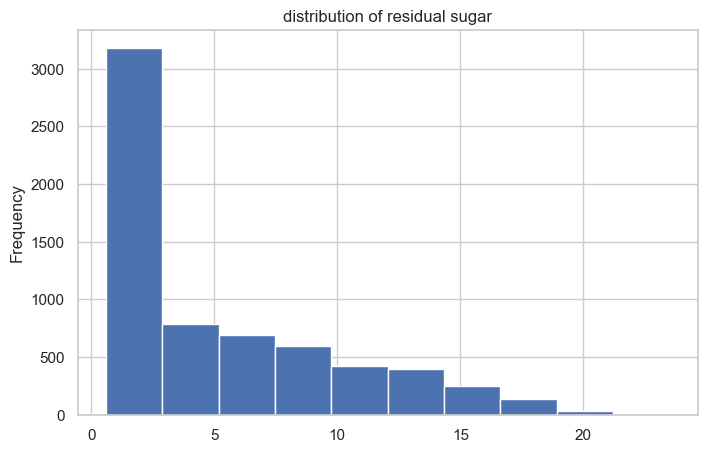

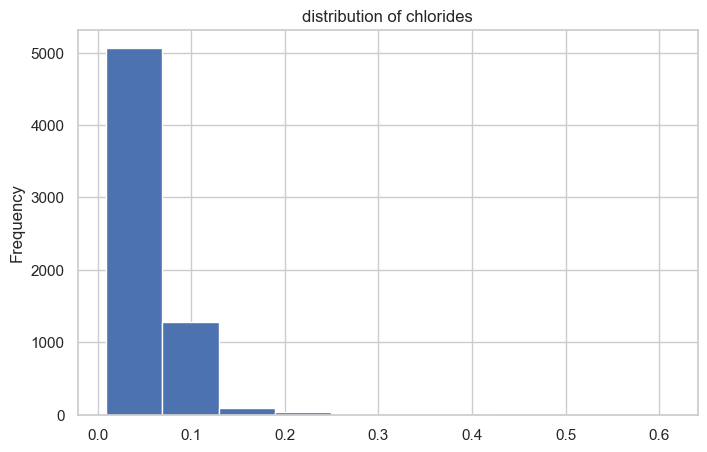

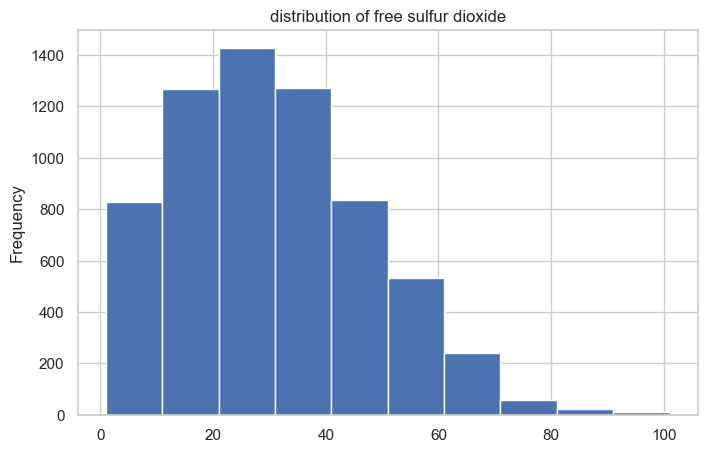

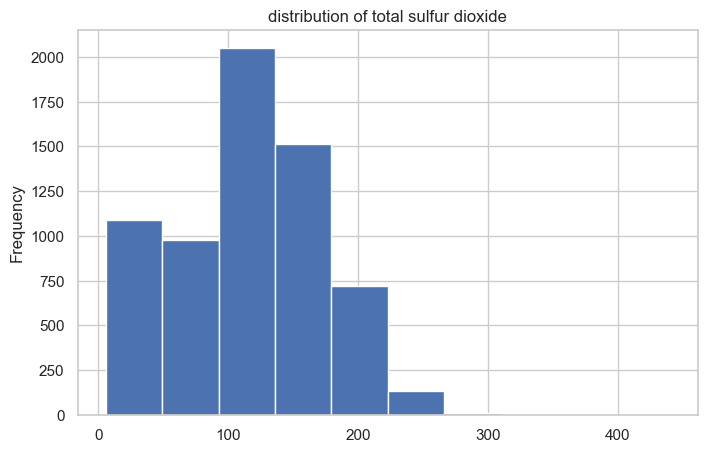

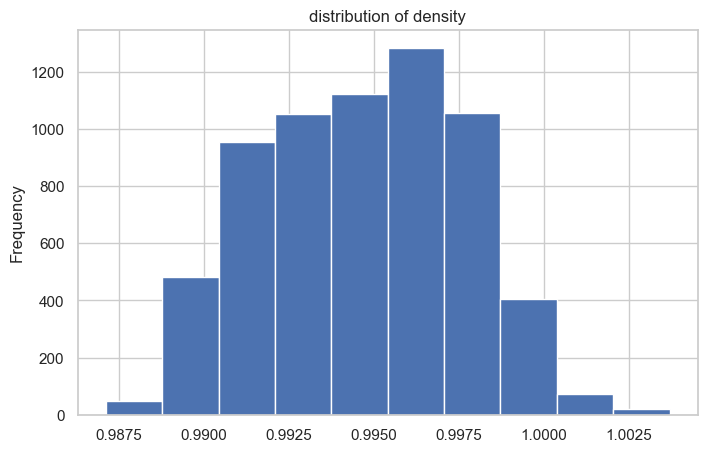

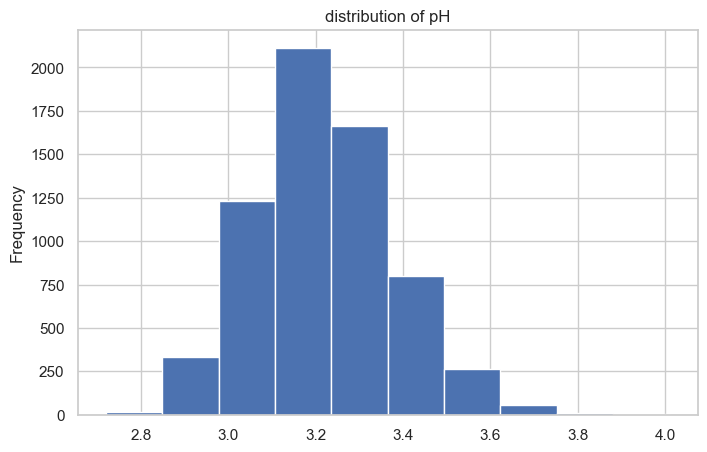

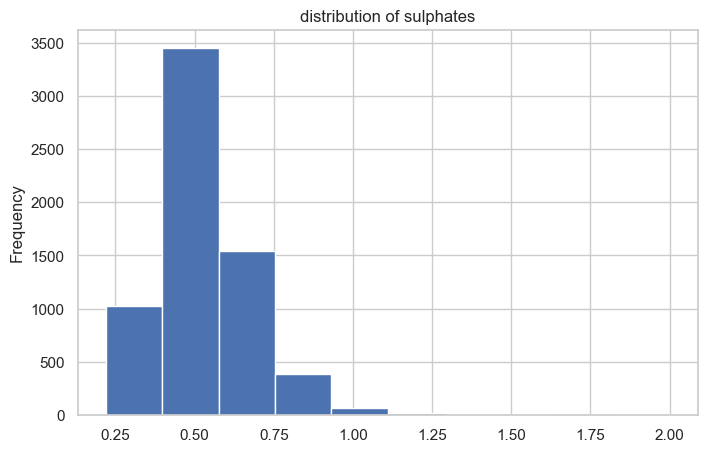

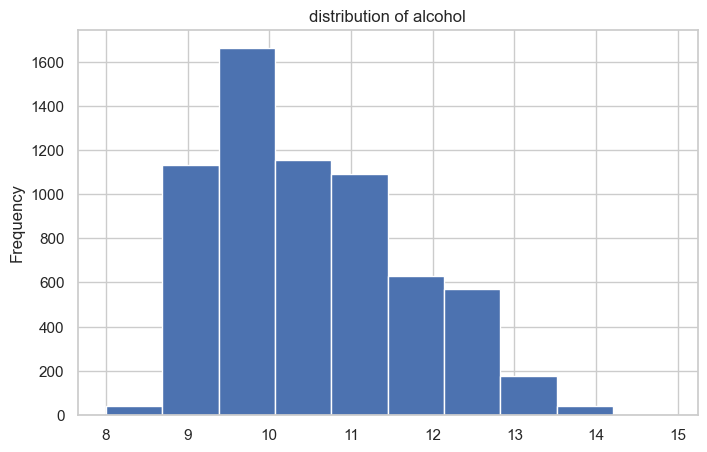

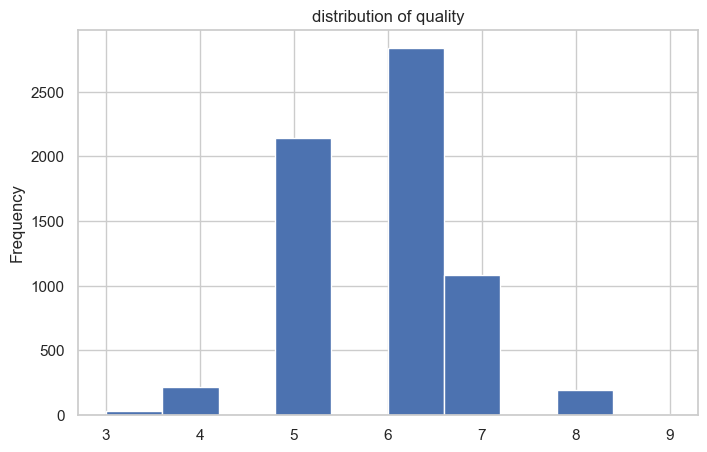

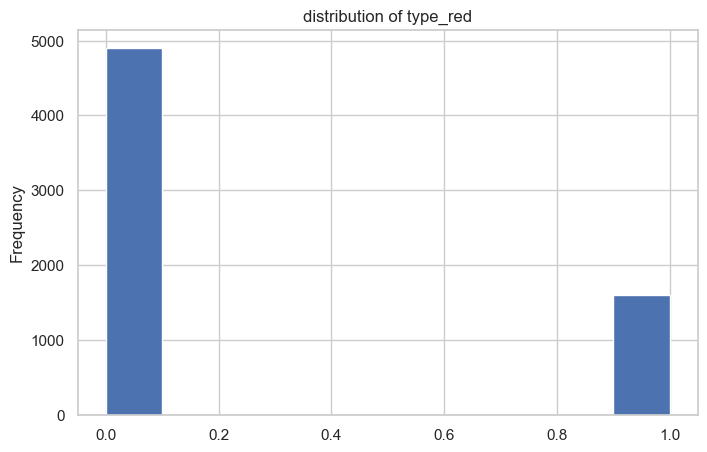

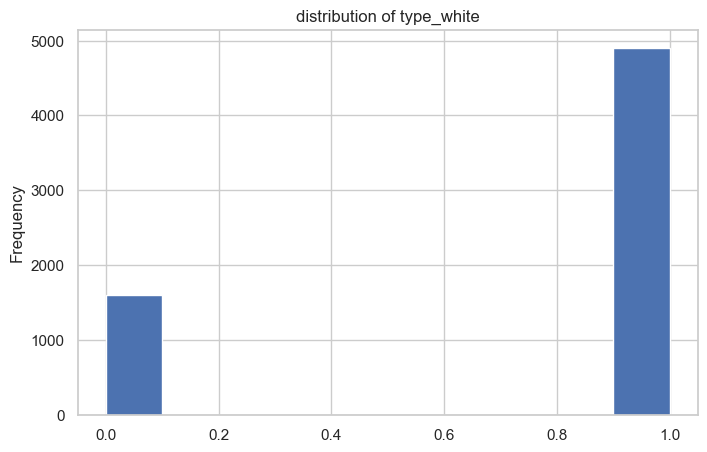

In [348]:
for col in df_num.columns:
    plt.figure(figsize=(8,5))
    plt.title(f'distribution of {col}')
    df[col].plot(kind='hist')

## Models

### Decistion Tree

In [353]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [354]:
df_num = df.drop('type', axis=1)

In [355]:
X = df_num.drop(['quality','type_red','type_white'], axis=1) 
y = df_num['quality'] 

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [357]:
clf = DecisionTreeClassifier(random_state=42)

In [358]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

###  Model Evaluation

In [359]:
y_pred = clf.predict(X_test)

In [360]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


In [361]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

F1 Score: 0.603400531220804
Confusion Matrix:
[[  0   1   1   0   0   0]
 [  0  14  16  10   5   1]
 [  7  18 281  98  14   2]
 [  2  11 103 373  79  11]
 [  2   7  13  81 103  15]
 [  0   0   3   7  13   9]]


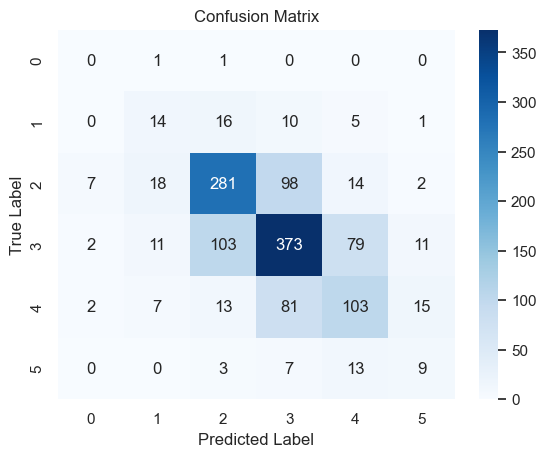

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.27      0.30      0.29        46
           5       0.67      0.67      0.67       420
           6       0.66      0.64      0.65       579
           7       0.48      0.47      0.47       221
           8       0.24      0.28      0.26        32

    accuracy                           0.60      1300
   macro avg       0.39      0.39      0.39      1300
weighted avg       0.61      0.60      0.60      1300



In [362]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

### Balancing target variable

In [363]:
y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [364]:
from imblearn.over_sampling import SMOTE

In [365]:
oversample = SMOTE(k_neighbors=4)

In [366]:
X, y = oversample.fit_resample(X,y)

In [367]:
y.value_counts()

quality
6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64

### Running Decision Tree With Data Balanced

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [369]:
clf = DecisionTreeClassifier(random_state=42)

In [370]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [372]:
y_pred = clf.predict(X_test)

F1 Score: 0.8095159230276731
Confusion Matrix:
[[558   6   6   4   0   2   0]
 [  8 475  48  27   6   4   0]
 [ 15  54 358 100  35   7   0]
 [  3  23  95 342  83  28   0]
 [  6   4  27  79 414  29   2]
 [  0   5   7  12  23 549   1]
 [  0   0   0   0   2   0 524]]


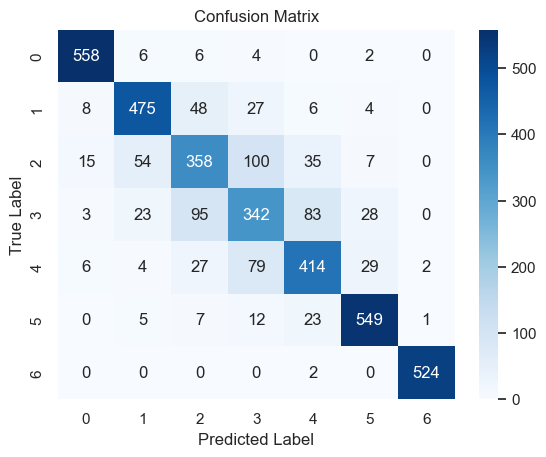

Classification Report:
              precision    recall  f1-score   support

           3       0.95      0.97      0.96       576
           4       0.84      0.84      0.84       568
           5       0.66      0.63      0.65       569
           6       0.61      0.60      0.60       574
           7       0.74      0.74      0.74       561
           8       0.89      0.92      0.90       597
           9       0.99      1.00      1.00       526

    accuracy                           0.81      3971
   macro avg       0.81      0.81      0.81      3971
weighted avg       0.81      0.81      0.81      3971



In [373]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

## Additional Models

In [374]:
from sklearn.model_selection import cross_val_score

In [375]:
def result(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test)*100)
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score)*100)

In [376]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result(model,X,y)

Accuracy:  33.08990178796273
CV Score:  32.51547269339995


In [377]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
result(model,X,y)

Accuracy:  88.79375472173257
CV Score:  82.50056740080952


In [378]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [380]:
pipeline = make_pipeline(StandardScaler(), SVC())


param_distributions = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'linear']
}

In [381]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


In [382]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validation score: {random_search.best_score_ * 100:.2f}%')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'svc__kernel': 'rbf', 'svc__gamma': 1, 'svc__C': 100}
Best cross-validation score: 88.22%


In [384]:
X_scaled = scaler.fit_transform(X) 

best_estimator = random_search.best_estimator_


cross_val_scores = cross_val_score(best_estimator, X_scaled, y, cv=5)
print(f"Cross-Validation Scores: {cross_val_scores.mean():.2f}% ± {cross_val_scores.std():.2f}%")


[CV] END ....svc__C=100, svc__gamma=0.01, svc__kernel=linear; total time= 3.9min
[CV] END .....svc__C=1, svc__gamma=0.001, svc__kernel=linear; total time=  18.5s
[CV] END ..........svc__C=100, svc__gamma=1, svc__kernel=rbf; total time=  25.5s
[CV] END ..........svc__C=100, svc__gamma=1, svc__kernel=rbf; total time=  24.0s
[CV] END ........svc__C=10, svc__gamma=1, svc__kernel=linear; total time=  44.6s
[CV] END ........svc__C=10, svc__gamma=1, svc__kernel=linear; total time=  45.6s
[CV] END ............svc__C=1, svc__gamma=1, svc__kernel=rbf; total time=  24.3s
[CV] END .........svc__C=1, svc__gamma=1, svc__kernel=linear; total time=  17.9s
[CV] END .........svc__C=1, svc__gamma=1, svc__kernel=linear; total time=  19.0s
[CV] END ......svc__C=100, svc__gamma=0.001, svc__kernel=rbf; total time=  22.6s
[CV] END .......svc__C=100, svc__gamma=1, svc__kernel=linear; total time= 3.7min
[CV] END .........svc__C=1, svc__gamma=0.01, svc__kernel=rbf; total time=  23.6s
[CV] END .........svc__C=1, 

In [385]:
df_num.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_red', 'type_white'],
      dtype='object')

In [386]:
trained_model = result(model,X,y)

Accuracy:  89.02039788466382
CV Score:  82.54589983932631


In [387]:
feature_importances = model.feature_importances_

Text(0.5, 1.0, 'Feature Importances from Random Forest Classifier')

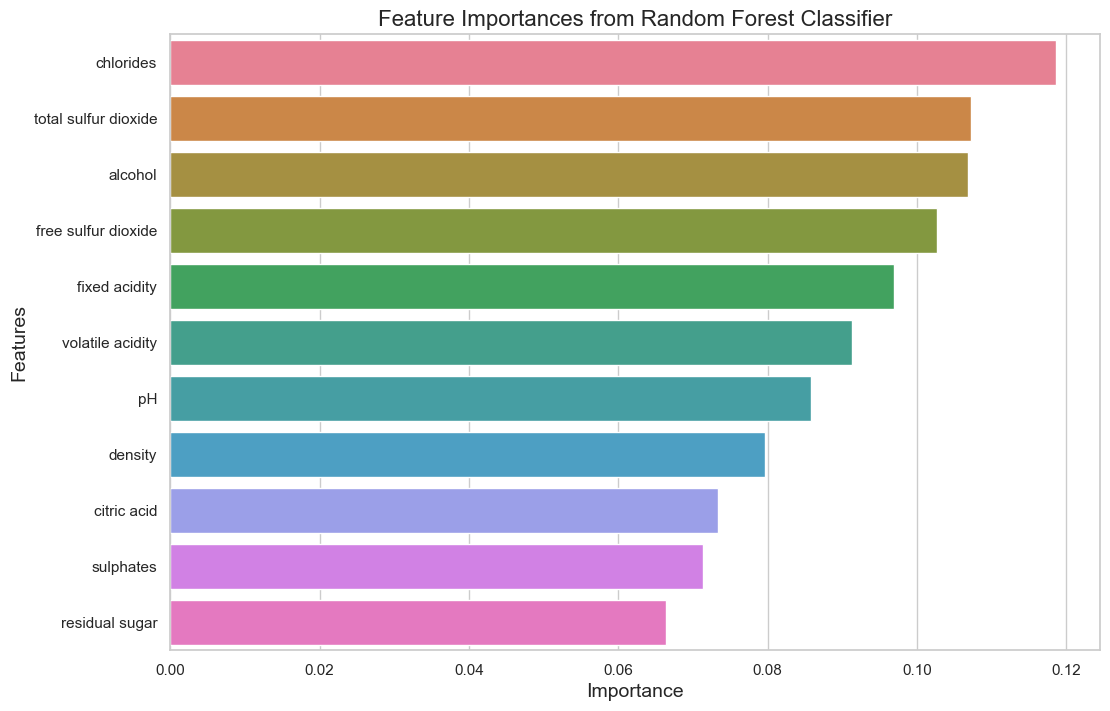

In [388]:
feature_names = X.columns

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))  
sns.set_style("whitegrid")  

palette = sns.color_palette("husl", len(feature_names))

sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette=palette)

plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances from Random Forest Classifier', fontsize=16)


### Export the model

In [389]:
import pickle

In [390]:
wine_prediction = 'lm_model_prediction.sav'
pickle.dump(model, open(wine_prediction,'wb'))

In [393]:
os.getcwd()

'/Users/samuelmascarenhas'